In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

# DATA INFORMATION

In [107]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.info()
#data_types = df.dtypes
#data_types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [108]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [109]:
df.shape

(150482, 17)

In [110]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,150479.000000,150482.000000,150482.000000,150482.000000,150141.000000,1.504820e+05,1.504790e+05
mean,98168.344154,2020.005436,67.877839,1312.644735,29.343950,2.111122e+08,5.297195e+10
std,2473.612184,3.015209,96.230009,9231.310215,14.824829,8.196388e+07,1.638841e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.693473e+08,5.303301e+10
50%,98122.000000,2021.000000,18.000000,0.000000,33.000000,2.150306e+08,5.303303e+10
75%,98370.000000,2023.000000,97.000000,0.000000,43.000000,2.399119e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [111]:
df.describe(include="O")

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,150482,150479,150479,150482,150482,150482,150482,150482,150475,150479
unique,9529,183,683,41,37,127,2,3,822,76
top,7SAYGDEE7P,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,807,79075,25675,150141,68983,28502,116807,69698,3869,55634


In [112]:
unique_values_per_column = df.apply(lambda col: col.unique())
num_unique_values_per_column = df.apply(lambda col: col.nunique())

print("\nUnique Value Count:")
num_unique_values_per_column


Unique Value Count:


VIN (1-10)                                             9529
County                                                  183
City                                                    683
State                                                    41
Postal Code                                             823
Model Year                                               22
Make                                                     37
Model                                                   127
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       150482
Vehicle Location                                        822
Electric Utility                                         76
2020 Census Tract                       

In [113]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [114]:
num_of_year = df['Model Year'].value_counts()
num_of_year

Model Year
2023    37079
2022    27799
2021    18684
2018    14441
2020    11294
2019    10717
2017     8574
2016     5650
2015     4934
2013     4566
2014     3613
2012     1633
2011      796
2024      642
2010       24
2008       19
2000        8
1999        4
2002        2
1998        1
2003        1
1997        1
Name: count, dtype: int64

In [115]:
num_of_state = df['State'].value_counts()
num_of_state

State
WA    150141
CA        92
VA        35
MD        33
TX        20
NC        13
IL        12
AZ        11
CO        11
FL         9
NJ         9
HI         8
OR         8
NY         7
CT         7
SC         6
NV         6
GA         5
DC         5
MO         4
MA         3
NE         3
LA         3
KY         3
AL         3
WY         2
KS         2
OH         2
IN         2
BC         2
AR         2
ID         2
UT         2
PA         2
AP         1
AK         1
MS         1
NH         1
DE         1
MT         1
MN         1
Name: count, dtype: int64

In [116]:
num_of_city = df['City'].value_counts().head(30)
num_of_city

City
Seattle              25675
Bellevue              7691
Redmond               5502
Vancouver             5310
Bothell               4861
Kirkland              4622
Sammamish             4436
Renton                4043
Olympia               3634
Tacoma                3121
Bellingham            2531
Issaquah              2365
Kent                  2276
Lynnwood              2210
Spokane               2204
Tukwila               2129
Mercer Island         2083
Everett               2043
Woodinville           2024
Snohomish             1740
Gig Harbor            1672
Shoreline             1641
Auburn                1632
Edmonds               1590
Bainbridge Island     1566
Camas                 1347
Seatac                1273
Federal Way           1207
Maple Valley          1161
Puyallup              1054
Name: count, dtype: int64

In [12]:
num_of_model = df['Model'].value_counts().head(20)
num_of_model

Model
MODEL Y           28502
MODEL 3           27709
LEAF              13187
MODEL S            7611
BOLT EV            5733
MODEL X            5114
VOLT               4890
ID.4               2999
NIRO               2876
PACIFICA           2642
WRANGLER           2629
MUSTANG MACH-E     2619
PRIUS PRIME        2527
X5                 2068
I3                 1917
FUSION             1829
EV6                1644
IONIQ 5            1638
C-MAX              1546
RAV4 PRIME         1525
Name: count, dtype: int64

In [13]:
num_of_make = df['Make'].value_counts()
num_of_make

Make
TESLA                   68983
NISSAN                  13497
CHEVROLET               12026
FORD                     7614
BMW                      6439
KIA                      6198
TOYOTA                   5223
VOLKSWAGEN               4074
VOLVO                    3536
JEEP                     3292
HYUNDAI                  3171
AUDI                     3006
CHRYSLER                 2642
RIVIAN                   2483
MERCEDES-BENZ            1054
PORSCHE                  1028
MITSUBISHI                849
HONDA                     810
FIAT                      806
MINI                      791
POLESTAR                  764
SUBARU                    623
SMART                     274
LINCOLN                   229
JAGUAR                    228
LUCID                     190
CADILLAC                  176
LEXUS                     138
MAZDA                     136
GENESIS                   107
LAND ROVER                 47
FISKER                     17
ALFA ROMEO                 12
AZURE

In [117]:
num_of_msrp = df['Base MSRP'].value_counts()
num_of_msrp

Base MSRP
0         147027
69900       1441
31950        399
52900        218
32250        152
59900        134
54950        133
39995        117
36900        101
44100         97
45600         84
64950         83
33950         74
52650         68
34995         64
36800         53
55700         50
53400         34
110950        21
90700         19
98950         19
81100         19
102000        17
75095         15
184400        11
43700         10
109000         7
89100          6
91250          5
32995          3
845000         1
Name: count, dtype: int64

In [118]:
num_of_evt = df['Electric Vehicle Type'].value_counts()
num_of_evt

Electric Vehicle Type
Battery Electric Vehicle (BEV)            116807
Plug-in Hybrid Electric Vehicle (PHEV)     33675
Name: count, dtype: int64

In [119]:
num_of_census = df['2020 Census Tract'].value_counts().head(30)
num_of_census

2020 Census Tract
5.303303e+10    1758
5.303303e+10     963
5.303303e+10     699
5.303301e+10     558
5.303303e+10     531
5.306701e+10     523
5.303303e+10     522
5.303302e+10     501
5.303303e+10     483
5.303303e+10     483
5.306105e+10     482
5.303302e+10     480
5.303301e+10     474
5.303302e+10     464
5.303302e+10     461
5.303303e+10     461
5.303301e+10     455
5.303303e+10     447
5.303303e+10     444
5.303302e+10     442
5.303301e+10     419
5.303303e+10     406
5.306105e+10     404
5.303303e+10     396
5.303303e+10     388
5.303302e+10     384
5.306105e+10     372
5.303302e+10     368
5.303302e+10     366
5.303303e+10     365
Name: count, dtype: int64

In [120]:
num_of_cav = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize = True)
num_of_cav

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    0.463165
Clean Alternative Fuel Vehicle Eligible                         0.418329
Not eligible due to low battery range                           0.118506
Name: proportion, dtype: float64

# DATA VISUALISATION

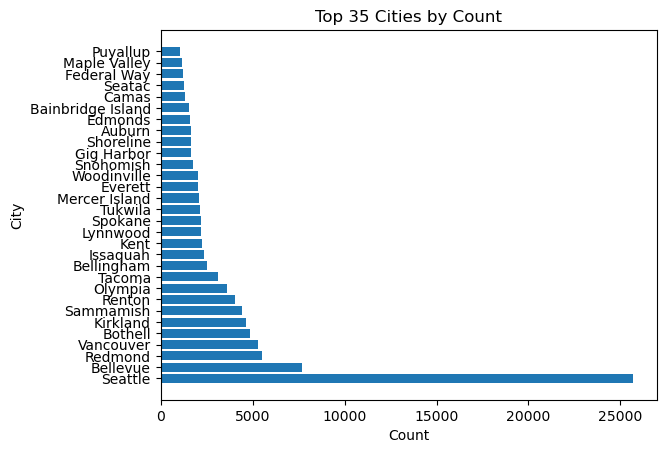

In [121]:
from matplotlib import pyplot as plt
import numpy as np
N = 35  # Adjust N to the number of top cities you want to display
top_cities = num_of_city.nlargest(N)

plt.barh(top_cities.index, top_cities)
plt.title(f"Top {N} Cities by Count")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()

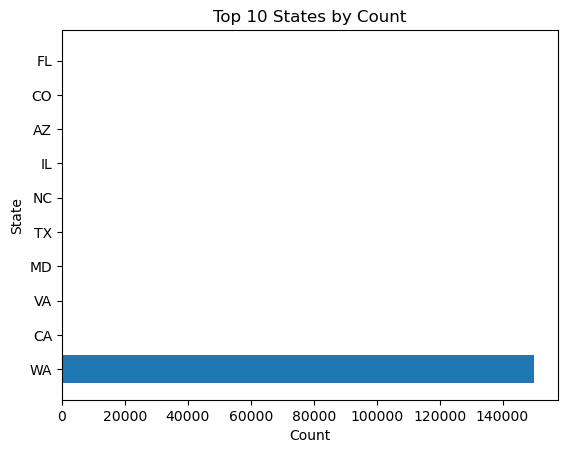

In [122]:
N = 10  
top_states = num_of_state.nlargest(N)

plt.barh(top_states.index, top_states)
plt.title(f"Top {N} States by Count")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()

In [123]:
wa_state = df[df['State'] == 'WA']
print(wa_state.shape)

(150141, 17)


In [124]:
not_wa_states = df[df['State'] != 'WA']
print(not_wa_states.shape)

(341, 17)


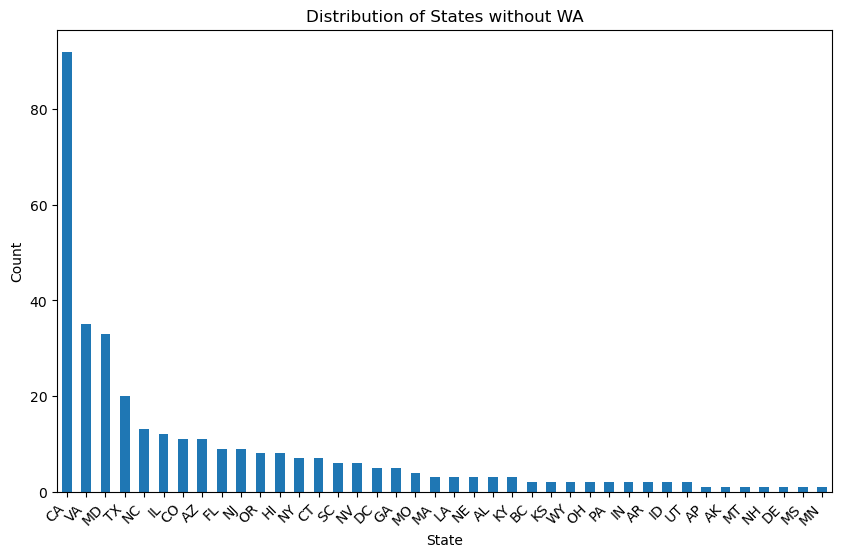

In [125]:
not_wa_states = df[df['State'] != 'WA']

state_counts = not_wa_states['State'].value_counts()

plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar')
plt.title("Distribution of States without WA")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

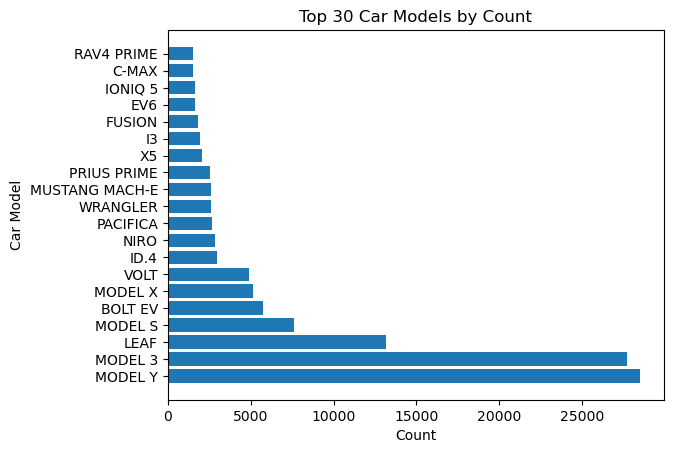

In [126]:
N = 30  
top_models = num_of_model.nlargest(N)

plt.barh(top_models.index, top_models)
plt.title(f"Top {N} Car Models by Count")
plt.xlabel("Count")
plt.ylabel("Car Model")
plt.show()

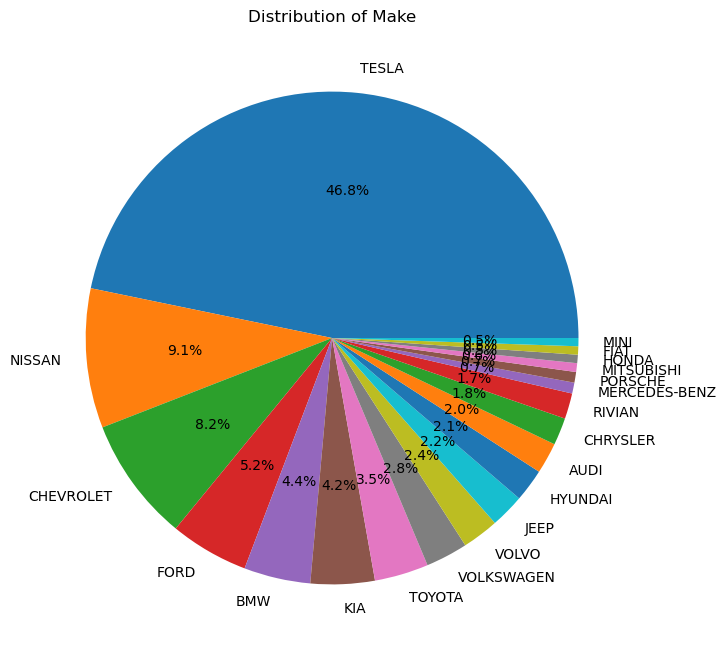

In [127]:
plt.figure(figsize=(8, 8))
N = 20
df['Make'].value_counts(normalize=True).nlargest(N).plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Make")
plt.ylabel("")
plt.show()

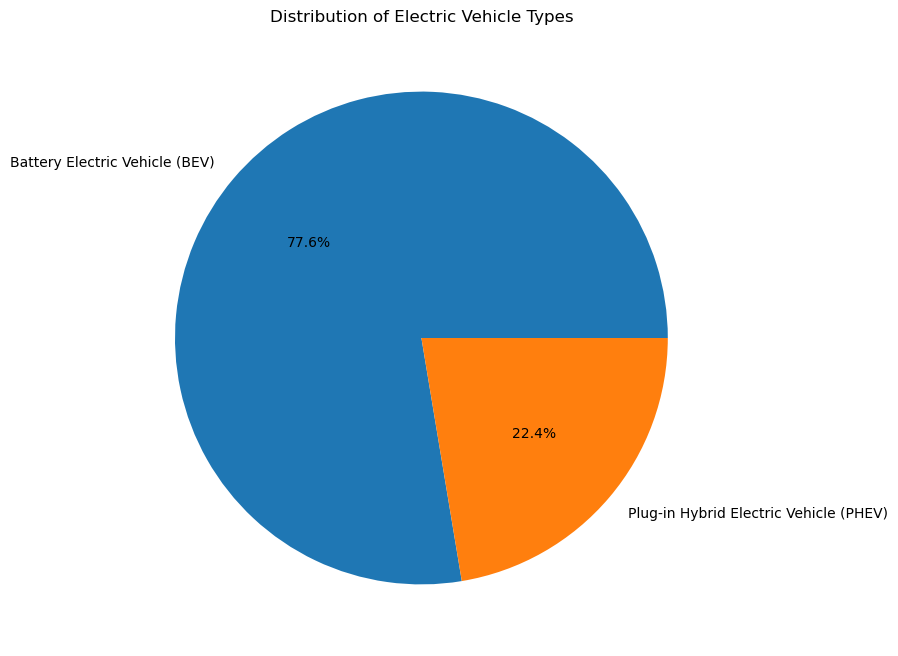

In [128]:
plt.figure(figsize=(8, 8))
df['Electric Vehicle Type'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Electric Vehicle Types")
plt.ylabel("")
plt.show()


In [129]:
import pandas as pd

tesla_models = df[df['Make'].str.upper() == 'TESLA']

# Display the Tesla models
print(tesla_models['Model'].unique())

['MODEL 3' 'MODEL Y' 'MODEL S' 'MODEL X' 'ROADSTER']


Model
MODEL Y     28502
MODEL 3     27709
MODEL S      7611
MODEL X      5114
ROADSTER       47
Name: count, dtype: int64


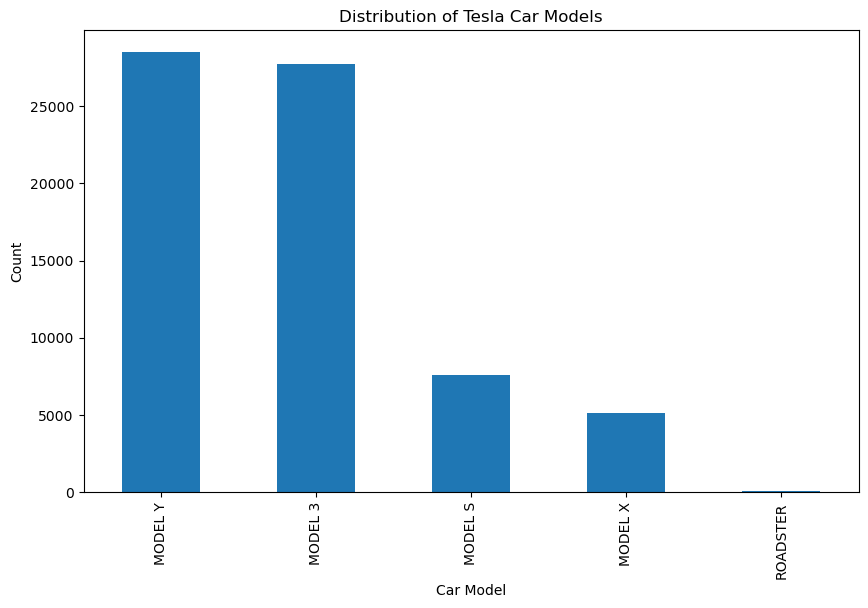

In [130]:
model_counts = tesla_models['Model'].value_counts()
print(model_counts)
# Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar')
plt.title("Distribution of Tesla Car Models")
plt.xlabel("Car Model")
plt.ylabel("Count")
plt.show()

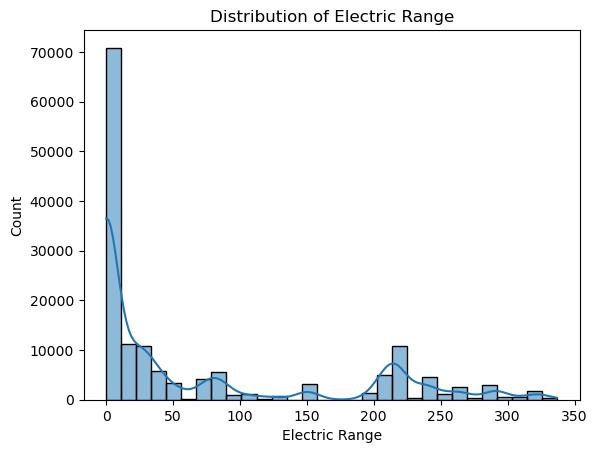

In [131]:
# Plot histogram - central tendency, spread, and shape of the data.

sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.show()

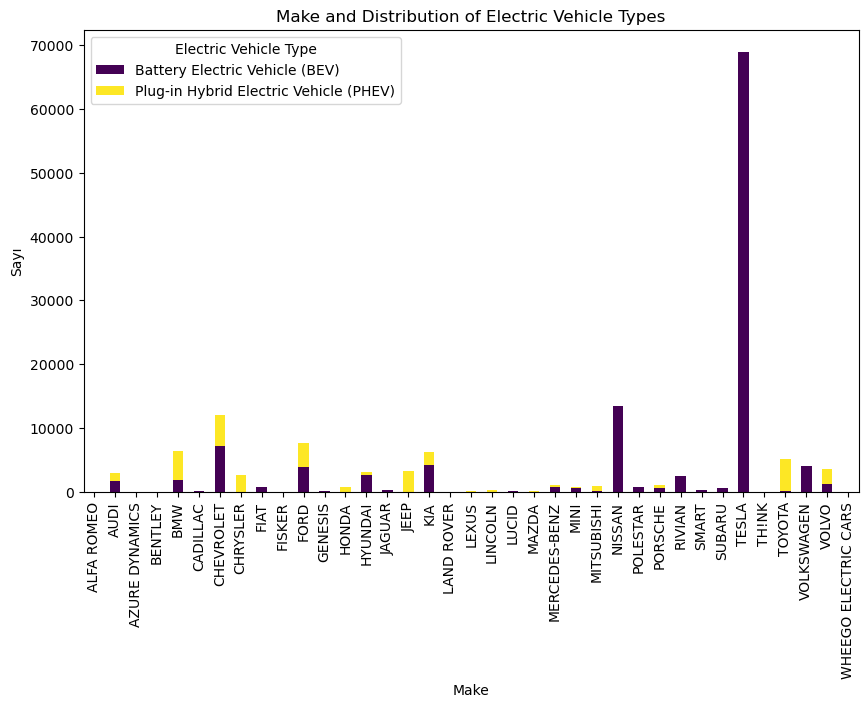

In [132]:

# "Make" ve "CAFV_Eligibility" değişkenlerini içeren bir tablo oluşturun
cross_table = pd.crosstab(df['Make'], df['Electric Vehicle Type'])

# Bar grafiğini çizin
cross_table.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

# Grafiği düzenleme
plt.title('Make and Distribution of Electric Vehicle Types')
plt.xlabel('Make')
plt.ylabel('Sayı')

# Grafiği göster
plt.show()

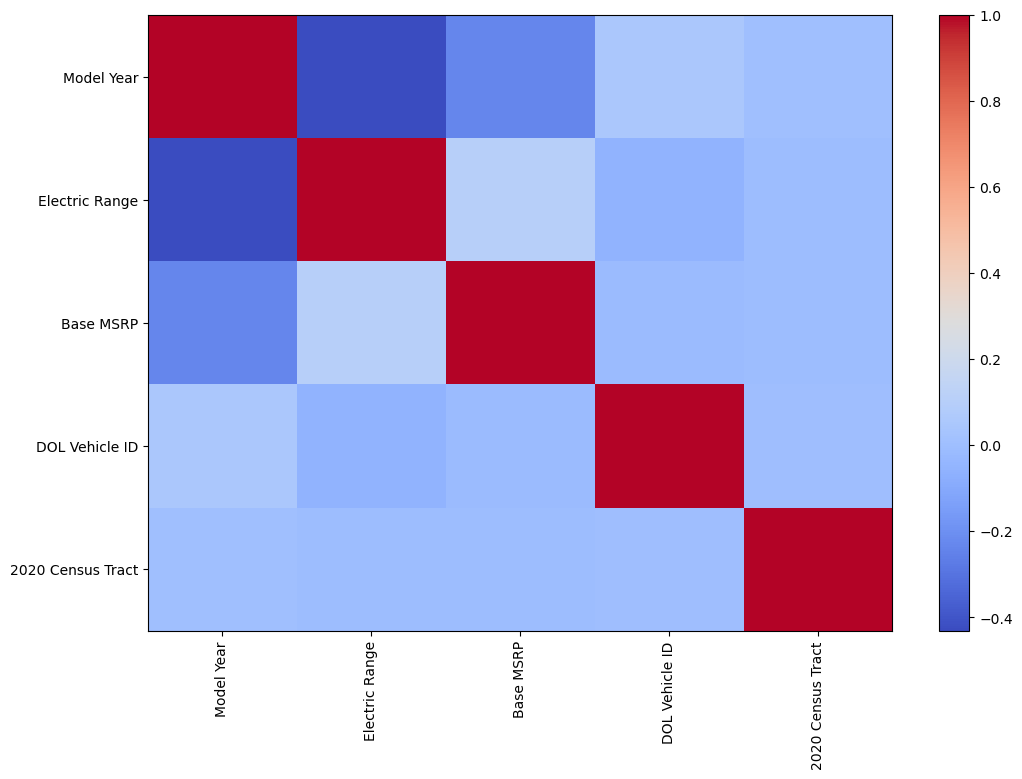

In [133]:
import matplotlib.pyplot as plt

numeric_columns = df[['Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract']]


correlation_matrix_numeric = numeric_columns.corr()

# Korelasyon matris
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix_numeric, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix_numeric)), correlation_matrix_numeric.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_numeric)), correlation_matrix_numeric.columns)
plt.show()


# MISSING VALUES

In [134]:
# check missing values

missing_values = df.isnull().sum()
missing_values


VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [135]:
# Her sütundaki eksik değer oranı
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_values_percentage)

VIN (1-10)                                           0.000000
County                                               0.001994
City                                                 0.001994
State                                                0.000000
Postal Code                                          0.001994
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.226605
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.004652
Electric Utility                                     0.001994
2020 Cen

In [136]:
low_missing_columns = missing_values_percentage[(missing_values_percentage > 0) & (missing_values_percentage <= 1)].index
print (low_missing_columns )

Index(['County', 'City', 'Postal Code', 'Legislative District',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


### 2020 Census Tract
It refers to a geographic area defined by the United States Census Bureau for the purpose of taking the decennial census, which is conducted every 10 years. Census tracts are relatively small, statistically defined subdivisions within counties or other geographic areas. They are designed to represent communities that are homogeneous with respect to population characteristics, economic status, and living conditions.

Key points about census tracts include:

---Geographic Size: Census tracts can vary in size but are generally designed to have a relatively uniform population size, typically ranging from around 1,200 to 8,000 people.

---Statistical Use: Census tracts are used for statistical and analytical purposes, helping to provide more detailed and localized demographic information than larger geographic units.

---Data Collection: Data collected during the decennial census, including information on population demographics, housing, and other socio-economic factors, is aggregated and reported at the census tract level. This allows for a more granular understanding of the population distribution.

---Community Representation: Census tracts are often used by researchers, policymakers, and planners to analyze and understand community characteristics. They play a crucial role in the allocation of resources, policy planning, and research.

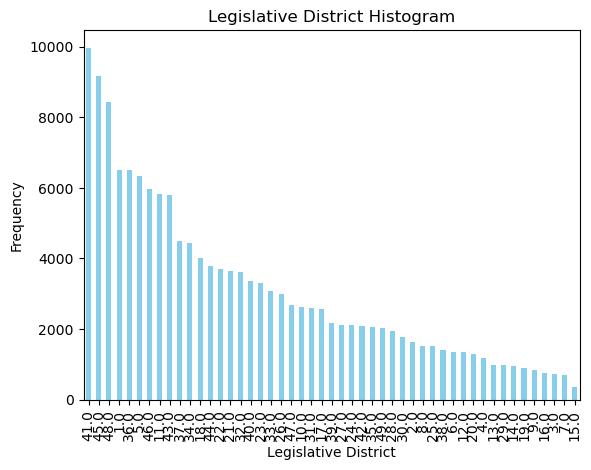

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Legislative District' sütununun histogramını çizin
df['Legislative District'].value_counts().plot(kind='bar', color='skyblue')

# Grafiği düzenleme
plt.title('Legislative District Histogram')
plt.xlabel('Legislative District')
plt.ylabel('Frequency')


plt.show()

In [138]:
import pandas as pd

# 'Legislative District' sütunundaki verilerin ortalaması
mean_value = df['Legislative District'].mean()

# 'Legislative District' sütunundaki verilerin medyanı
median_value = df['Legislative District'].median()

print(f'Ortalama: {mean_value}')
print(f'Medyan: {median_value}')

Ortalama: 29.34395002031424
Medyan: 33.0


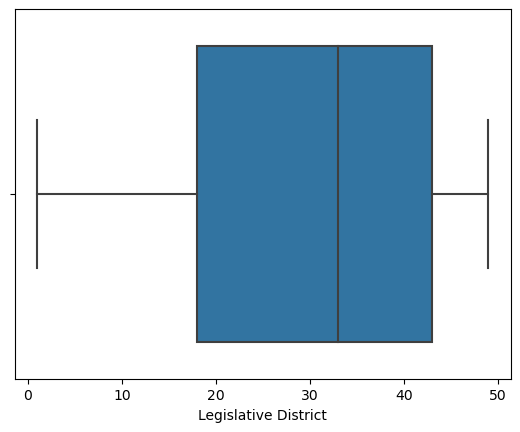

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Legislative District'])
plt.show()


In [140]:
import pandas as pd

df['Legislative District'].fillna(df['Legislative District'].mean(), inplace=True)

In [141]:
columns = ['County','City', 'Postal Code', 'Vehicle Location', 'Electric Utility','2020 Census Tract']
df = df.dropna(subset=columns)

In [142]:
missing_values = df.isnull().sum()
missing_values

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [143]:
# check if the VIN values are unique for each car.

row_count = len(df)
vin_unique_count = df['VIN (1-10)'].nunique()
ct_unique_count = df['2020 Census Tract'].nunique()

print("Is VIN (1-10) values are unique:", row_count - vin_unique_count == 0)
print("Is 2020 Census Tract values are unique:", row_count - ct_unique_count == 0)



Is VIN (1-10) values are unique: False
Is 2020 Census Tract values are unique: False


### Postal Codes
In the United States, postal codes are known as ZIP Codes, which stands for "Zone Improvement Plan Code." ZIP Codes help facilitate the sorting and delivery of mail by assigning unique codes to specific geographic areas. ZIP Codes in the United States typically consist of five digits.

Here are a few examples of ZIP Codes:

10001 (New York, NY), 90210 (Beverly Hills, CA), 60601 (Chicago, IL)

In [144]:
selected_columns = ['Postal Code', 'City']


# Creating a new dataset with selected columns
new_dataset = df[selected_columns]
new_dataset
#x= new_dataset[new_dataset['County']=='Yakima']
#x

,Postal Code,City
0,98103.0,Seattle
1,98011.0,Bothell
2,98908.0,Yakima
3,98034.0,Kirkland
4,98501.0,Olympia
...,...,...
150477,98563.0,Montesano
150478,98104.0,Seattle
150479,98109.0,Seattle
150480,98043.0,Mountlake Terrace


In [145]:
selected_columns = ['Electric Utility', 'State']
new_dataset = df[selected_columns]
new_dataset

,Electric Utility,State
0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),WA
1,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),WA
2,PACIFICORP,WA
3,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),WA
4,PUGET SOUND ENERGY INC,WA
...,...,...
150477,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,WA
150478,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),WA
150479,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),WA
150480,PUGET SOUND ENERGY INC,WA


In [146]:
# no duplicated values

df.duplicated().any()

False

# FEATURE ENGINEERING

In [147]:
selected_columns = ['Vehicle Location', 'County']
new_dataset = df[selected_columns]
new_dataset

,Vehicle Location,County
0,POINT (-122.34301 47.659185),King
1,POINT (-122.20578 47.762405),King
2,POINT (-120.6027202 46.5965625),Yakima
3,POINT (-122.209285 47.71124),King
4,POINT (-122.89692 47.043535),Thurston
...,...,...
150477,POINT (-123.60535 46.982215),Grays Harbor
150478,POINT (-122.329075 47.6018),King
150479,POINT (-122.34848 47.632405),King
150480,POINT (-122.30842 47.78416),Snohomish


In [148]:
# Extracting latitude and longitude into new columns
df[['Vehicle Location Longitude', 'Vehicle Location Latitude']] = df['Vehicle Location'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)')


In [149]:
# Converting the datatype to numeric
df['Vehicle Location Longitude'] = pd.to_numeric(df['Vehicle Location Longitude'])
df['Vehicle Location Latitude'] = pd.to_numeric(df['Vehicle Location Latitude'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150475 entries, 0 to 150481
Data columns (total 19 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150475 non-null  object 
 1   County                                             150475 non-null  object 
 2   City                                               150475 non-null  object 
 3   State                                              150475 non-null  object 
 4   Postal Code                                        150475 non-null  float64
 5   Model Year                                         150475 non-null  int64  
 6   Make                                               150475 non-null  object 
 7   Model                                              150475 non-null  object 
 8   Electric Vehicle Type                              150475 non-null  object 
 9 

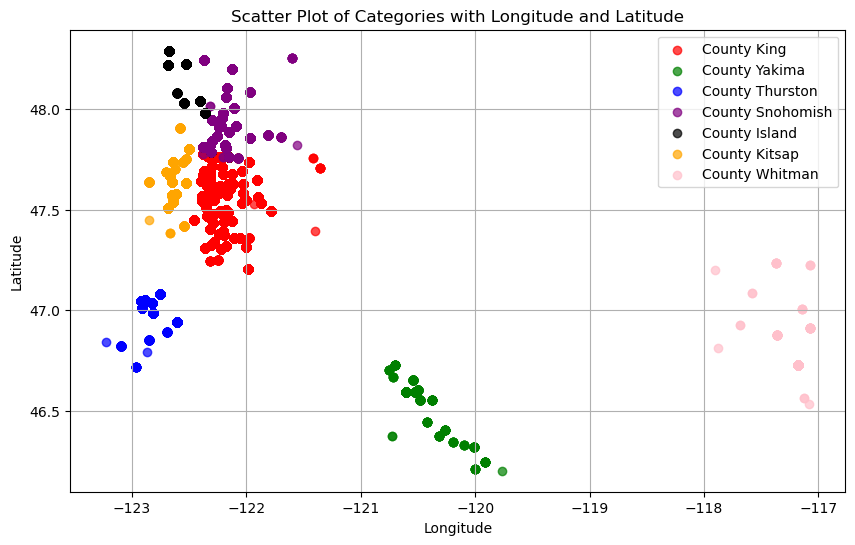

In [150]:

plt.figure(figsize=(10, 6))

for category, color in zip(df['County'].unique(), ['red', 'green', 'blue', 'purple', 'black', 'orange', 'pink']):
    subset_df = df[df['County'] == category]
    plt.scatter(subset_df['Vehicle Location Longitude'], subset_df['Vehicle Location Latitude'], label=f'County {category}', color=color, alpha=0.7)

plt.title('Scatter Plot of Categories with Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()



In [151]:
# DELETING UNNECESSARY COLUMNS
df = df.drop(columns=['VIN (1-10)', 'City', 'Vehicle Location', 
                      'Electric Utility', '2020 Census Tract', 'Base MSRP',  
                      'DOL Vehicle ID', 'Vehicle Location Longitude', 
                      'Vehicle Location Latitude'], axis=1)
# DELETING ROWS WITH NULL VALUES
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150475 entries, 0 to 150481
Data columns (total 10 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             150475 non-null  object 
 1   State                                              150475 non-null  object 
 2   Postal Code                                        150475 non-null  float64
 3   Model Year                                         150475 non-null  int64  
 4   Make                                               150475 non-null  object 
 5   Model                                              150475 non-null  object 
 6   Electric Vehicle Type                              150475 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  150475 non-null  object 
 8   Electric Range                                     150475 non-null  int64  
 9 

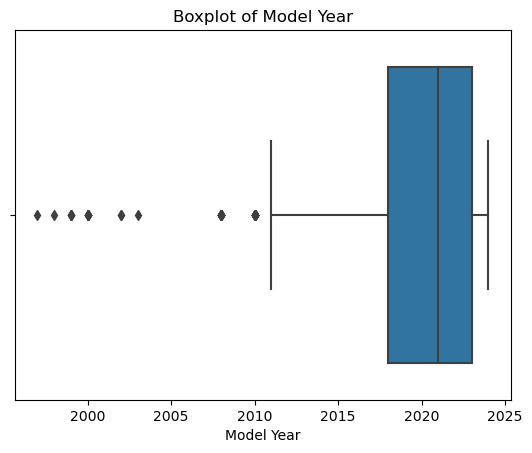

In [152]:
#Box plot - numerical data and identifying outliers.
sns.boxplot(x=df['Model Year'])
plt.title('Boxplot of Model Year')
plt.show()

In [153]:
# REMOVING OUTLIERS

max_threshold = df['Model Year'].quantile(0.95)
min_threshold = df['Model Year'].quantile(0.05)
print("Minimum threshold: ", min_threshold, "Maximum threshold: ", max_threshold)



Minimum threshold:  2014.0 Maximum threshold:  2023.0


In [154]:
df = df[df['Model Year'] > min_threshold]
df = df[df['Model Year'] < max_threshold]

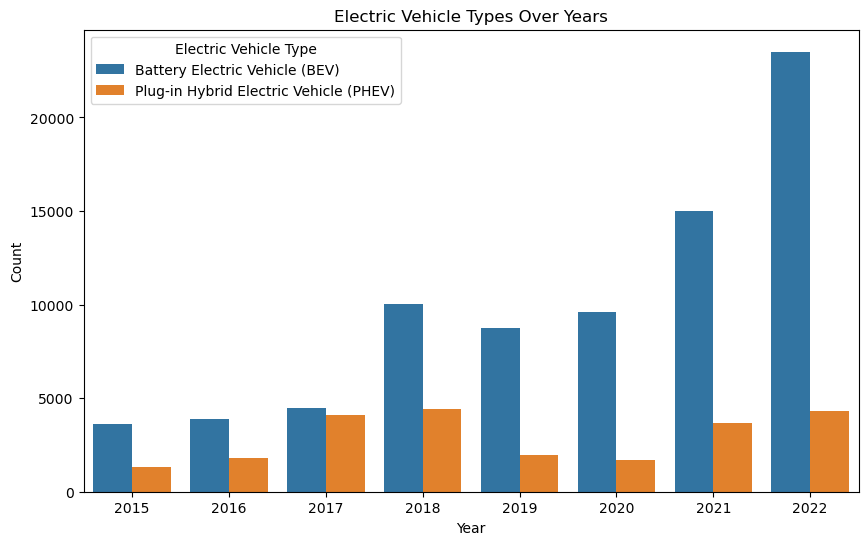

In [155]:
# EV Types x Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Model Year', hue='Electric Vehicle Type', data=df)

# Add labels and title
plt.title('Electric Vehicle Types Over Years')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()

# Label Encoding

In [156]:
# LABEL ENCODING

#category_mapping = {'Clean Alternative Fuel Vehicle Eligible': 0, 'B': 2, 'C': 3}
#df['Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(category_mapping)

columns_to_encode = ['County','State','Make','Model',
                     'Electric Vehicle Type', 
                     'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

le = LabelEncoder()

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])
    
df.head(10)

,County,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District
0,73,37,98103.0,2020,9,54,0,0,258,43.0
1,73,37,98011.0,2022,11,43,1,2,25,1.0
3,73,37,98034.0,2018,26,57,0,0,215,45.0
4,158,37,98501.0,2018,2,47,1,0,97,22.0
5,146,37,98271.0,2020,26,57,0,0,266,38.0
6,73,37,98042.0,2017,5,66,1,0,33,47.0
7,73,37,98072.0,2020,26,60,0,0,291,45.0
8,68,37,98239.0,2018,26,57,0,0,215,10.0
10,73,37,98033.0,2018,26,57,0,0,215,48.0
11,75,37,98367.0,2016,7,40,1,2,19,26.0


In [157]:
df.shape

(102088, 10)

In [158]:
# FEATURE SCALING

sc = MinMaxScaler()
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns = ['County','Postal Code', 'State', 'Model Year', 
                                 'Make', 'Model', 'Electric Vehicle Type', 
                                 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
                                 'Electric Range', 'Legislative District'])
df.head(10)

,County,Postal Code,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District
0,0.421965,0.973684,0.984936,0.714286,0.310345,0.545455,0.0,0.0,0.765579,0.875000
1,0.421965,0.973684,0.983995,1.000000,0.379310,0.434343,1.0,1.0,0.074184,0.000000
2,0.421965,0.973684,0.984230,0.428571,0.896552,0.575758,0.0,0.0,0.637982,0.916667
3,0.913295,0.973684,0.989003,0.428571,0.068966,0.474747,1.0,0.0,0.287834,0.437500
4,0.843931,0.973684,0.986653,0.714286,0.896552,0.575758,0.0,0.0,0.789318,0.770833
5,0.421965,0.973684,0.984312,0.285714,0.172414,0.666667,1.0,0.0,0.097923,0.958333
6,0.421965,0.973684,0.984619,0.714286,0.896552,0.606061,0.0,0.0,0.863501,0.916667
7,0.393064,0.973684,0.986326,0.428571,0.896552,0.575758,0.0,0.0,0.637982,0.187500
8,0.421965,0.973684,0.984220,0.428571,0.896552,0.575758,0.0,0.0,0.637982,0.979167
9,0.433526,0.973684,0.987634,0.142857,0.241379,0.404040,1.0,1.0,0.056380,0.520833


## Feature Selection

In [159]:
df.head()

,County,Postal Code,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District
0,0.421965,0.973684,0.984936,0.714286,0.310345,0.545455,0.0,0.0,0.765579,0.875000
1,0.421965,0.973684,0.983995,1.000000,0.379310,0.434343,1.0,1.0,0.074184,0.000000
2,0.421965,0.973684,0.984230,0.428571,0.896552,0.575758,0.0,0.0,0.637982,0.916667
3,0.913295,0.973684,0.989003,0.428571,0.068966,0.474747,1.0,0.0,0.287834,0.437500
4,0.843931,0.973684,0.986653,0.714286,0.896552,0.575758,0.0,0.0,0.789318,0.770833


In [160]:

target_column = 'Electric Vehicle Type'
X = df.drop(target_column, axis=1)  #independent columns
y = df[target_column]


In [161]:
bestfeatures = SelectKBest(chi2, k=9)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# CHI2 RESULTS
featureScores.sort_values(by='Score', ascending=False)

,Specs,Score
6,Clean Alternative Fuel Vehicle (CAFV) Eligibility,6350.368228
7,Electric Range,3412.136948
4,Make,3086.464986
3,Model Year,428.531924
5,Model,369.812240
8,Legislative District,26.898972
0,County,1.375350
1,Postal Code,0.010763
2,State,0.000004


In [162]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

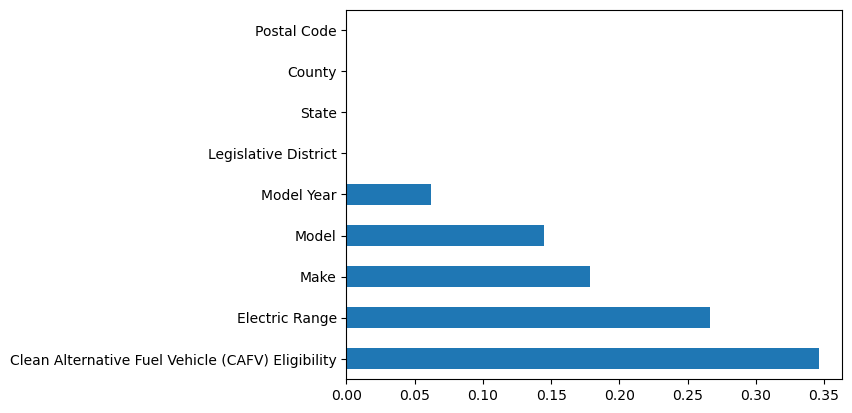

In [163]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn. metrics import explained_variance_score, mean_absolute_error, r2_score

In [165]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test will be the resulting training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [166]:
model_ridge = Ridge()

In [167]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [168]:
parameters_ridge = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False]
    }

In [169]:
grid_ridge = GridSearchCV (model_ridge, parameters_ridge, scoring='neg_mean_absolute_error', n_jobs=-1,cv = 2)
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sag']},
             scoring='neg_mean_absolute_error')

In [170]:
print(" Results from Grid Search for Ridge " )
print("\n The best estimator across ALL searched params:\n",grid_ridge.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_ridge.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_ridge.best_params_)

 Results from Grid Search for Ridge 

 The best estimator across ALL searched params:
 Ridge(alpha=0.0001, fit_intercept=False, solver='sag')

 The best score across ALL searched params:
 -0.19517695463070903

 The best parameters across ALL searched params:
 {'alpha': 0.0001, 'fit_intercept': False, 'solver': 'sag'}


In [171]:
from time import time
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    LogisticRegression(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()   

KNeighborsRegressor()
	Training time: 0.021s
	Prediction time: 0.379s
	Explained variance: 0.990338713957754
	Mean absolute error: 0.0030691873183792072
	R2 score: 0.9903360683444875

GradientBoostingRegressor()
	Training time: 2.944s
	Prediction time: 0.027s
	Explained variance: 0.9936283146541088
	Mean absolute error: 0.007744437523053769
	R2 score: 0.9936280590295585

LogisticRegression()
	Training time: 0.135s
	Prediction time: 0.001s
	Explained variance: 0.46444030743953624
	Mean absolute error: 0.09387142064191727
	R2 score: 0.4615541955504213

ExtraTreesRegressor()
	Training time: 1.198s
	Prediction time: 0.056s
	Explained variance: 0.9985886748073984
	Mean absolute error: 0.0003065922225487315
	R2 score: 0.9985886726787511

RandomForestRegressor()
	Training time: 2.385s
	Prediction time: 0.037s
	Explained variance: 0.9990268729610681
	Mean absolute error: 0.00022039377020276226
	R2 score: 0.9990268083709004

DecisionTreeRegressor()
	Training time: 0.037s
	Prediction time: 0.001

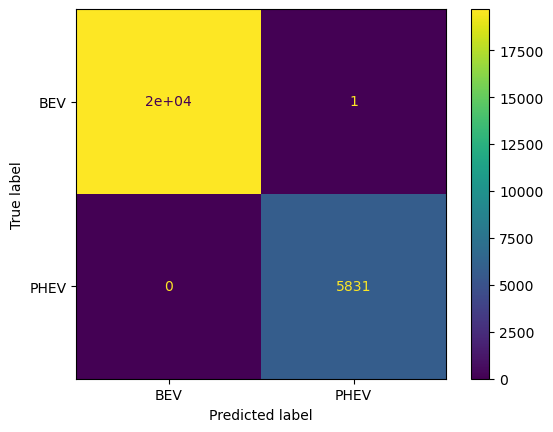

In [172]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)  # Use ExtraTreesClassifier for classification
etc.fit(X_train, y_train)

y_test_predicted = etc.predict(X_test)
cm = confusion_matrix(y_test, y_test_predicted, labels=etc.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BEV', 'PHEV'])
cm_disp.plot()

#Ekin Alaydin-201928004 #Boran Kuzukiran-202028301 #Ezgi Keten-201911204